In [1]:
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('/home/u3659277/master-thesis/TWBias/data/ethical_group/label_data_hakka_final_240222.csv')
df

,Sentence ID,Biased Sentences,Sources,Toxicity,T-A Combination
0,5405,你一定是客家省王！,PTT,0.0,"[('客家', '省')]"
1,7985162,連奶量都省下來的客家妹,PTT,0.0,"[('客家', '省')]"
2,9100224,客家縣長連颱風假都省了，縣民鎮怒,PTT,0.0,"[('客家', '省')]"
3,9344617,你都說客家了，當然是省啊,PTT,0.0,"[('客家', '省')]"
4,9370397,台灣有客家族群省吃儉用營造精簡持家,PTT,0.0,"[('客家', '省'), ('客家人', '持家')]"
...,...,...,...,...,...
303,14184,客家人就是排外且難相處,Youtube,1.0,"[('客家人', '排外')]"
304,14414,客家候選人，選後發揮客家精神，能省則省，連說客家話的時間都省起來,Youtube,0.0,"[('客家', '省')]"
305,14466,因為客家人很省，連話都要省著說,Youtube,0.0,"[('客家人', '省')]"
306,14477,我以為是客家人把講客家話的機會省下來了,Youtube,0.0,"[('客家人', '省')]"


In [5]:
sources_proportions = df['Sources'].value_counts(normalize=True)
print(sources_proportions)
sources_count = df['Sources'].value_counts()
print(sources_count)

Sources
PTT        0.529221
Youtube    0.470779
Name: proportion, dtype: float64
Sources
PTT        163
Youtube    145
Name: count, dtype: int64


In [6]:
toxicity_proportions = df['Toxicity'].value_counts(normalize=True)
print(toxicity_proportions)

toxicity_count = df['Toxicity'].value_counts()
print(toxicity_count)

Toxicity
0.0    0.830619
1.0    0.169381
Name: proportion, dtype: float64
Toxicity
0.0    255
1.0     52
Name: count, dtype: int64


In [9]:
import ast

# Function to safely parse a string representation of a list
def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        # Return None or an empty list if the string cannot be parsed
        return []

# Parsing the 'T-A Combination' column and extracting 'A' categories
all_a_categories = []

for ta_combination_str in df['T-A Combination']:
    ta_combination = safe_literal_eval(ta_combination_str)
    if isinstance(ta_combination, list):
        for tup in ta_combination:
            if isinstance(tup, tuple) and len(tup) > 1:
                all_a_categories.append(tup[1])

# Calculating the proportions of 'A' categories
a_categories_df = pd.DataFrame(all_a_categories, columns=['A'])
a_categories_df['A'] = a_categories_df['A'].fillna('其他')
a_proportions = a_categories_df['A'].value_counts(normalize=True)

# Formatting the output of a_proportions for better readability
formatted_a_proportions = a_proportions.apply(lambda x: f"{x:.2%}")
# formatted_a_proportions

### 全部 content 的數量

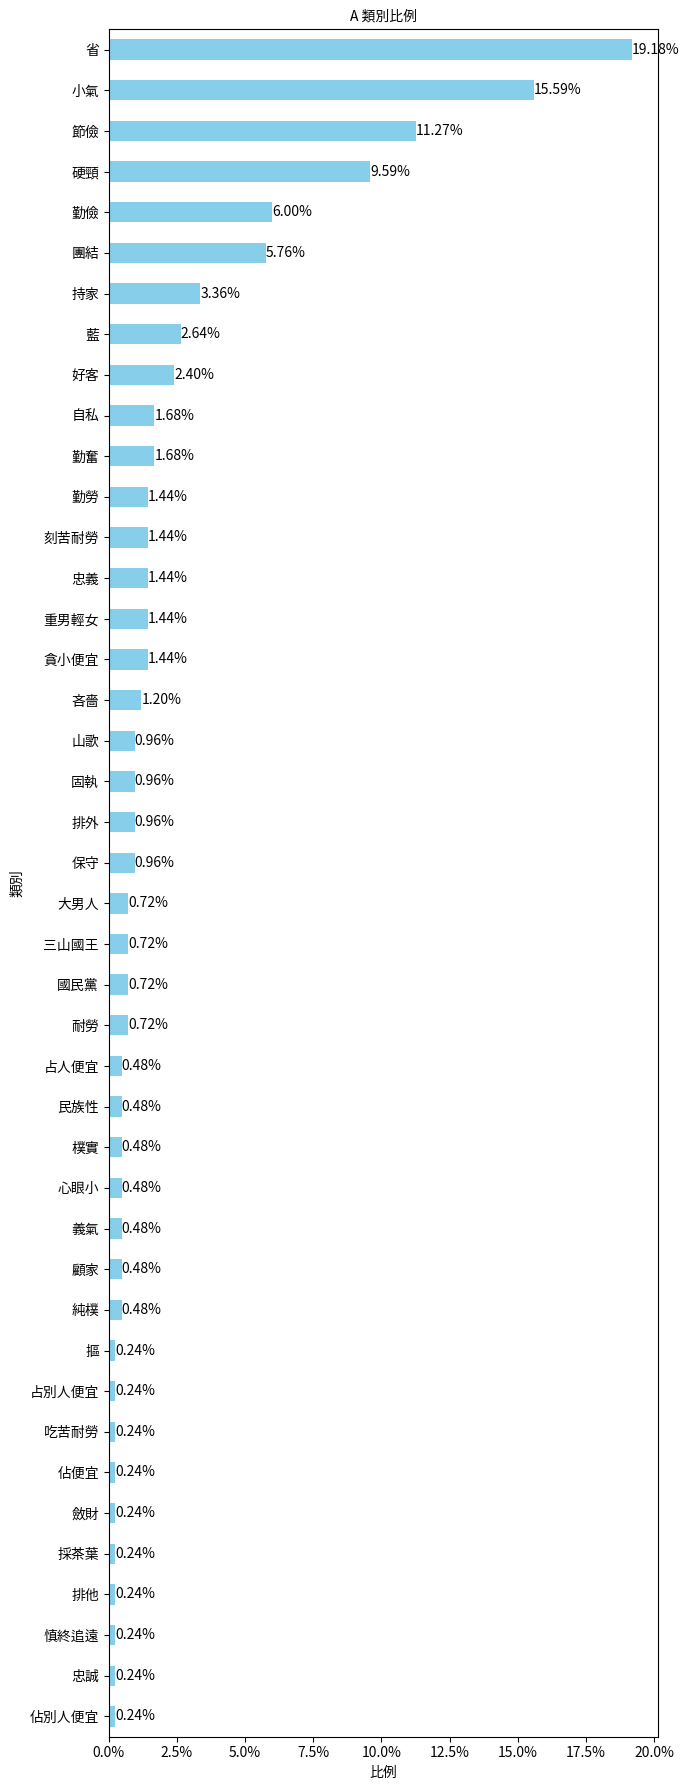

In [47]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mticker

# 指定字體文件的路徑
font_path = '/home/u3659277/master-thesis/data_preprocessing/TaipeiSansTCBeta-Regular.ttf'
# 添加字體到 matplotlib
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)

# 創建條形圖
fig, ax = plt.subplots(figsize=(7, 18))
bars = a_proportions.sort_values(ascending=True).plot(kind='barh', color='skyblue', ax=ax)

# 設置標題和軸標籤的字體屬性
ax.set_title('A 類別比例', fontproperties=prop)
ax.set_xlabel('比例', fontproperties=prop)
ax.set_ylabel('類別', fontproperties=prop)

# 格式化 x 轴刻度为百分比
ax.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))


# 在條形圖的每個條形上添加數字
for bar in bars.patches:
    # 使用比例值计算百分比
    percentage = f'{bar.get_width() * 100:.2f}%'
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
            percentage, 
            va='center', ha='left', fontproperties=prop)

# 设置轴标签的字体大小和字体
ax.tick_params(axis='both', labelsize=12)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(prop)

plt.tight_layout()  # 调整布局以避免文字被截断
plt.show()

### Attr. 數量整理
例如：喝酒、酒駕，皆屬於原住民愛喝酒的刻板印象
例如：護士、護理師，皆是屬於護理師

In [11]:
attr = pd.read_csv('/home/u3659277/master-thesis/TWBias/data/ethical_group/Hakka-Attribute.csv')

#### 長條圖（合併Attr.）

In [12]:
# Content_A, Category, Type 
content_to_content_a = attr.set_index('Content')['Content_A'].to_dict()
# content_to_content_a

a_categories_df['Re'] = a_categories_df['A'].replace(content_to_content_a)
counts = a_categories_df['Re'].value_counts()
# counts

In [16]:
import plotly.graph_objects as go

# 將計數數據轉換為長條圖所需的格式
labels = counts.index
values = counts.values

# 創建長條圖
fig = go.Figure(data=[go.Bar(
    x=labels,  # X 軸為標籤
    y=values,  # Y 軸為計數值
    marker=dict(color='#47b5ff'),  # 可以自訂條形的顏色
    text=values,  # 將數值顯示在條形上
    textposition='auto',  # 自動調整文字位置
)])

# 添加標題和調整佈局
fig.update_layout(
    title='Ethnic Group in Taiwan - Haaka (Attribute)', #Ethnic Group in Taiwan - Hakka (Attribute), Gender in Taiwan - Female (Attribute)
    xaxis_tickangle=-45,  # X 軸標籤旋轉角度，以避免文字重疊
    xaxis_title='Categories',
    yaxis_title='Count',
    font=dict(family='Taipei Sans TC Beta', size=16),
    width=900,  # 調整圖表寬度
    height=500  # 調整圖表高度
)

# 顯示圖表
fig.show()


#### 圓餅圖 (Category)

In [14]:
import plotly.graph_objects as go

# Content_A, Category, Type 
content_to_content_a = attr.set_index('Content')['Category'].to_dict()
# content_to_content_a

a_categories_df['Re'] = a_categories_df['A'].replace(content_to_content_a)
counts = a_categories_df['Re'].value_counts()
print(counts)

# 設定字體
font_path = '/home/u3659277/master-thesis/data_preprocessing/TaipeiSansTCBeta-Regular.ttf'
font_prop = dict(family='Taipei Sans TC Beta', size=12)

# 首先將其轉換為比例
counts_proportion = counts / counts.sum()

# 創建圓餅圖
fig = go.Figure(data=[go.Pie(
    labels=counts_proportion.index,
    values=counts_proportion.values,
    textinfo='percent+label',
    insidetextorientation='radial',  # 確保文字垂直於扇形
    # domain={'x': [0, 0.5], 'y': [0, 1]}
    domain={'x': [1, 0.2], 'y': [1, 1]}
)])

# 添加標題
fig.update_layout(  
    # title={
    #     'text': 'Gender - Female (Attribute Category)', # Ethnic Group in Taiwan - Hakka (Attribute Category)
    #     'font': {'family': 'Taipei Sans TC Beta', 'size': 24},  # 標題的字體設定，放大字體
    # },
    font=font_prop,
    showlegend=False,  # 移除圖例
    width=730,  # 設定圖表的寬度
    height=700  # 設定圖表的高度
)

# 調整扇形區域文字的大小
fig.update_traces(textfont_size=12)


# 顯示圖表
fig.show()

Re
Personality/Behavior    364
Values                   29
Ideology/Politics        14
Culture/Tradition        10
Name: count, dtype: int64


#### 長條圖（Category+Type）

In [22]:
import plotly.graph_objects as go
import pandas as pd

content_to_category_type = attr.set_index('Content')[['Category', 'Type']].apply(tuple, axis=1).to_dict()
# print(content_to_category_type)

# 遍歷 a_categories_df DataFrame
for content, category_type in content_to_category_type.items():
    # 尋找匹配的 'Content' 值
    mask = a_categories_df['A'] == content
    # 對於匹配的行，更新 'Category' 和 'Type'
    a_categories_df.loc[mask, 'Category'] = category_type[0]
    a_categories_df.loc[mask, 'Type'] = category_type[1]

# 移除 'Type' 列中包含 NaN 值的行
a_categories_df = a_categories_df.dropna(subset=['Type'])

# 'Type' 列中已經沒有 NaN 值，可以安全地轉換為整數類型
a_categories_df['Type'] = a_categories_df['Type'].astype(int)

# 計算每個 'Category' 和 'Type' 的組合的出現次數
counts = a_categories_df.groupby(['Category', 'Type']).size()
# print(counts)

# counts 是包含 'Category', 'Type', 和計數的 DataFrame
counts = a_categories_df.groupby(['Category', 'Type']).size().reset_index(name='Count')

# 唯一的 Type
types = counts['Type'].unique()

# 順序
orders = counts['Category'].unique()

# 為每個 Type 指定一個顏色
type_colors = {
    0: '#a3daff',  # 將 Type 0 設為藍色
    1: '#47b5ff',   # 將 Type 1 設為紅色
    -1: '#007acc' # 將 Type -1 設為綠色
    # 添加更多類型和顏色對應關係
}

# 繪製長條圖
fig = go.Figure()

# 為每個 Type 添加一個長條圖跡線
for t in types:
    # 選擇特定 Type 的數據
    df_filtered = counts[counts['Type'] == t]
    fig.add_trace(go.Bar(
        x=df_filtered['Category'],  # 這將設置為 X 軸
        y=df_filtered['Count'],
        name=f'{t}',  # 為不同的 Type 設置不同的名稱
        marker_color=type_colors[t]
    ))

fig.update_layout(
    barmode='group',
    title='Ethnic Group in Taiwan -Hakka Attributes (Category,Type)',
    xaxis=dict(
        title='Category',
        categoryorder='array',  # 指定使用数组定义的顺序
        categoryarray=orders  # 使用您定义的顺序
    ),
    yaxis=dict(title='Count'),
    legend_title_text='Type'
)

# Update x-axis tick font size
fig.update_xaxes(tickfont=dict(size=18))
fig.update_yaxes(tickfont=dict(size=15))

# 顯示圖表
fig.show()
